--> In this, we will be applying the FB Prophet model to the Electric Production dataset

In [1]:
import yfinance as yf

from prophet import Prophet

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

import plotly.graph_objs as go

C:\Users\Malhar.Pandya\AppData\Roaming\Python\Python310\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data = pd.read_csv('Electric_Production.csv')
data['DATE'] = pd.to_datetime(data['DATE'])

data.head()

,DATE,IPG2211A2N
0,1985-01-01,72.5052
1,1985-02-01,70.6720
2,1985-03-01,62.4502
3,1985-04-01,57.4714
4,1985-05-01,55.3151


In [3]:
data.columns = ['ds', 'y']
data.head()

,ds,y
0,1985-01-01,72.5052
1,1985-02-01,70.6720
2,1985-03-01,62.4502
3,1985-04-01,57.4714
4,1985-05-01,55.3151


In [4]:
train = data.iloc[:388]
test = data.iloc[388:]

In [5]:
train

,ds,y
0,1985-01-01,72.5052
1,1985-02-01,70.6720
2,1985-03-01,62.4502
3,1985-04-01,57.4714
4,1985-05-01,55.3151
...,...,...
383,2016-12-01,112.7694
384,2017-01-01,114.8505
385,2017-02-01,99.4901
386,2017-03-01,101.0396


In [6]:
test

,ds,y
388,2017-05-01,92.0805
389,2017-06-01,102.1532
390,2017-07-01,112.1538
391,2017-08-01,108.9312
392,2017-09-01,98.6154
393,2017-10-01,93.6137
394,2017-11-01,97.3359
395,2017-12-01,114.7212
396,2018-01-01,129.4048


--> Building a model without taking care of the seasonality

In [8]:
model1 = Prophet()

model1.fit(train)

12:41:51 - cmdstanpy - INFO - Chain [1] start processing
12:41:51 - cmdstanpy - INFO - Chain [1] done processing


In [18]:
future1 = model1.make_future_dataframe(periods=365)
future1

forecast1 = model1.predict(future1)
forecast1

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1985-01-01,61.412239,70.409582,77.445220,61.412239,61.412239,12.531765,12.531765,12.531765,12.531765,12.531765,12.531765,0.0,0.0,0.0,73.944004
1,1985-02-01,61.594780,62.839190,69.725389,61.594780,61.594780,4.691590,4.691590,4.691590,4.691590,4.691590,4.691590,0.0,0.0,0.0,66.286371
2,1985-03-01,61.759656,57.306728,64.531097,61.759656,61.759656,-0.878369,-0.878369,-0.878369,-0.878369,-0.878369,-0.878369,0.0,0.0,0.0,60.881287
3,1985-04-01,61.942198,48.809228,56.206119,61.942198,61.942198,-9.492802,-9.492802,-9.492802,-9.492802,-9.492802,-9.492802,0.0,0.0,0.0,52.449396
4,1985-05-01,62.118851,49.385471,56.484398,62.118851,62.118851,-9.206522,-9.206522,-9.206522,-9.206522,-9.206522,-9.206522,0.0,0.0,0.0,52.912329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
748,2018-03-28,103.346303,84.687000,91.826244,103.290783,103.397119,-15.021731,-15.021731,-15.021731,-15.021731,-15.021731,-15.021731,0.0,0.0,0.0,88.324572
749,2018-03-29,103.346879,86.236802,93.389345,103.291044,103.397693,-13.536893,-13.536893,-13.536893,-13.536893,-13.536893,-13.536893,0.0,0.0,0.0,89.809986
750,2018-03-30,103.347455,87.766367,94.692432,103.291149,103.398268,-12.138114,-12.138114,-12.138114,-12.138114,-12.138114,-12.138114,0.0,0.0,0.0,91.209341
751,2018-03-31,103.348031,88.815818,95.927588,103.291253,103.399004,-10.862956,-10.862956,-10.862956,-10.862956,-10.862956,-10.862956,0.0,0.0,0.0,92.485075


In [21]:
per1 = pd.merge(test, forecast1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']], on='ds')

In [22]:
per1

,ds,y,yhat,yhat_lower,yhat_upper
0,2017-05-01,92.0805,93.949130,90.154723,97.131618
1,2017-06-01,102.1532,101.733992,98.055196,105.222714
2,2017-07-01,112.1538,108.904521,105.251254,112.828824
3,2017-08-01,108.9312,108.973466,105.600965,112.142065
4,2017-09-01,98.6154,100.388681,96.765415,104.062266
5,2017-10-01,93.6137,94.060330,90.436994,97.559232
6,2017-11-01,97.3359,96.946036,93.339058,100.249419
7,2017-12-01,114.7212,109.722269,106.144386,113.226929
8,2018-01-01,129.4048,116.024010,112.452372,119.330137


In [23]:
performance_baseline_MAE = mean_absolute_error(per1['y'], per1['yhat'])
print(performance_baseline_MAE)

performance_baseline_MAPE = mean_absolute_percentage_error(per1['y'], per1['yhat'])
print(performance_baseline_MAPE)

2.952097639882118
0.0252769002799719


--> The performance of this model is pretty good. But now we will try a model which will take seasonality into account

In [24]:
model2 = Prophet(yearly_seasonality=True, weekly_seasonality=True)

model2.fit(train)

12:54:12 - cmdstanpy - INFO - Chain [1] start processing
12:54:12 - cmdstanpy - INFO - Chain [1] done processing


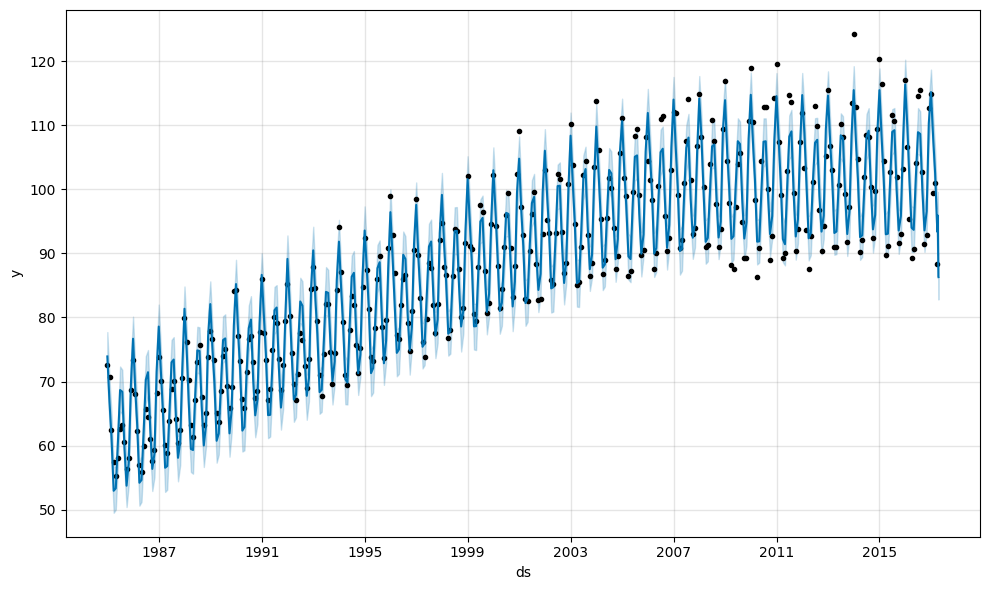

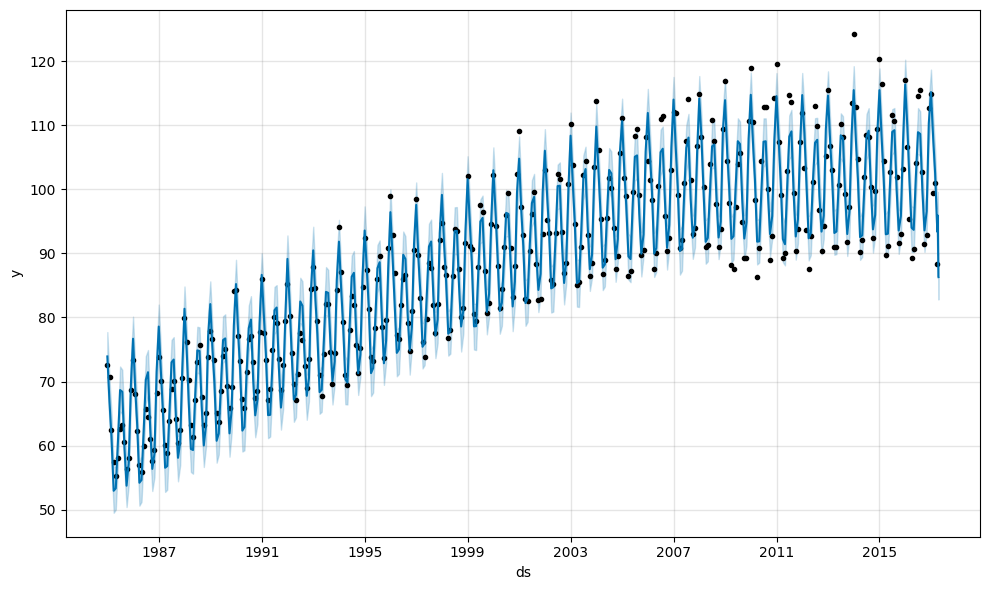

In [25]:
future2 = model2.make_future_dataframe(periods=16)

forecast2 = model2.predict(future2)

model2.plot(forecast2)

In [26]:
per2 = pd.merge(test, forecast1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']], on='ds')

per2_MAE = mean_absolute_error(per2['y'], per2['yhat'])
print(performance_baseline_MAE)

per2_MAPE = mean_absolute_percentage_error(per2['y'], per2['yhat'])
print(performance_baseline_MAPE)

2.952097639882118
0.0252769002799719


--> DAMN! It is the same performance